# Dataset

Este conjunto de dados contém informações de incidentes de TI relatados ao CERT.br (Centro de Estudos, Resposta e Tratamento de Incidentes de Segurança no Brasil).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/bloom/Downloads/archive/cert_2010-2019.csv', delimiter=';')

print(df.head())

    Ano        Mes  Total  Worm    DOS  Invasao   Web   Scan  Fraude  Outros
0  2019    Janeiro  62481  7796   4191       19  2594  46038    1744      99
1  2019  Fevereiro  70069  7707   2192       27  4179  54401    1459     104
2  2019      Março  85409  4476  29309       19  2006  47966    1521     112
3  2019      Abril  59900  7624   2718       37  1555  45774    2119      73
4  2019       Maio  52129  6555  15773       74  1425  25521    2633     148


In [3]:
df.head(5)

,Ano,Mes,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,62481,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,70069,7707,2192,27,4179,54401,1459,104
2,2019,Março,85409,4476,29309,19,2006,47966,1521,112
3,2019,Abril,59900,7624,2718,37,1555,45774,2119,73
4,2019,Maio,52129,6555,15773,74,1425,25521,2633,148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ano      120 non-null    int64 
 1   Mes      120 non-null    object
 2   Total    120 non-null    int64 
 3   Worm     120 non-null    int64 
 4   DOS      120 non-null    int64 
 5   Invasao  120 non-null    int64 
 6   Web      120 non-null    int64 
 7   Scan     120 non-null    int64 
 8   Fraude   120 non-null    int64 
 9   Outros   120 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 9.5+ KB


In [5]:
df.count()

Ano        120
Mes        120
Total      120
Worm       120
DOS        120
Invasao    120
Web        120
Scan       120
Fraude     120
Outros     120
dtype: int64

In [6]:
df.describe()

,Ano,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2014.500000,51360.641667,3448.166667,8261.991667,265.675000,2855.583333,24064.991667,9184.675000,3279.558333
std,2.884324,38427.807026,2357.209104,27204.101583,391.464524,2396.054371,13109.143640,17528.364123,6239.560820
min,2010.000000,8223.000000,865.000000,0.000000,1.000000,402.000000,2920.000000,1459.000000,30.000000
25%,2012.000000,30145.500000,1836.250000,13.000000,22.750000,1329.750000,13255.000000,3294.250000,240.750000
50%,2014.500000,47623.000000,2862.000000,210.500000,103.500000,2001.500000,23249.500000,5324.000000,1141.500000
75%,2017.000000,58682.250000,4146.500000,5955.750000,374.500000,3534.250000,32565.750000,7815.750000,3489.750000
max,2019.000000,257618.000000,12871.000000,207780.000000,2149.000000,12169.000000,60890.000000,130108.000000,32746.000000


Vamos começar pela análise dos dados fornecidos. Parece que se refere a ataques cibernéticos ao longo dos anos.

1. **Quantidade de registros**: 120 registros. Isto sugere uma observação mensal ao longo de 10 anos (120 meses / 12 meses por ano).

2. **Ano**:
    - Varia de 2010 a 2019.
    - Como é um valor contínuo e parece ser o eixo temporal do conjunto de dados, não precisamos olhar para métricas como média ou desvio padrão. Eles não forneceriam insights significativos aqui.

3. **Total de Ataques**:
    - Média: 51.361 ataques por mês.
    - Desvio padrão: 38.428.
    - Varia de 8.223 a 257.618 ataques em um mês.

4. **Worm**:
    - Média: 3.448 ataques por mês.
    - Desvio padrão: 2.357.
    - Varia de 865 a 12.871 ataques em um mês.

5. **DOS**:
    - Média: 8.262 ataques por mês.
    - Desvio padrão: 27.204.
    - Varia de 0 a 207.780 ataques em um mês. A presença de um valor máximo tão alto e um desvio padrão grande indica possíveis picos ou surtos de ataques DOS durante o período.

6. **Invasão**:
    - Média: 266 ataques por mês.
    - Desvio padrão: 391.
    - Varia de 1 a 2.149 ataques em um mês.

7. **Web**:
    - Média: 2.856 ataques por mês.
    - Desvio padrão: 2.396.
    - Varia de 402 a 12.169 ataques em um mês.

8. **Scan**:
    - Média: 24.065 ataques por mês.
    - Desvio padrão: 13.109.
    - Varia de 2.920 a 60.890 ataques em um mês.

9. **Fraude**:
    - Média: 9.185 ataques por mês.
    - Desvio padrão: 17.528.
    - Varia de 1.459 a 130.108 ataques em um mês.

10. **Outros**:
    - Média: 3.280 ataques por mês.
    - Desvio padrão: 6.240.
    - Varia de 30 a 32.746 ataques em um mês.

### Insights e Conclusões:

1. **Ataques DOS**: Este tipo de ataque possui o maior desvio padrão, o que sugere uma variação significativa ao longo dos anos. É importante notar o valor máximo extremamente alto de 207.780, o que pode indicar um surto específico em algum momento durante o período analisado.

2. **Ataques Worm e Scan**: Representam um volume significativo dos ataques totais, o que sugere que foram as formas mais prevalentes de ataques durante o período.

3. **Ataques de Invasão**: São menos frequentes, mas dada a natureza potencialmente crítica de uma invasão bem-sucedida, mesmo um pequeno número é motivo de preocupação.

4. **Fraudes**: Também mostraram um valor máximo muito alto em relação à média, indicando que pode ter havido picos específicos de fraudes em determinados períodos.

5. Seria interessante visualizar esses dados em um gráfico de séries temporais para identificar tendências, surtos ou padrões sazonais. Além disso, uma análise mais aprofundada de correlações entre os diferentes tipos de ataques pode fornecer insights sobre se a ocorrência de um tipo de ataque tende a preceder ou coincidir com outros.

Em um cenário real, para um analista de dados sênior, além desta análise inicial, seria importante entender o contexto dos dados, a fonte, qualquer anormalidade e investigar outliers. Também seria útil realizar análises preditivas ou de clusterização para entender melhor os padrões e potencialmente prever futuros ataques.

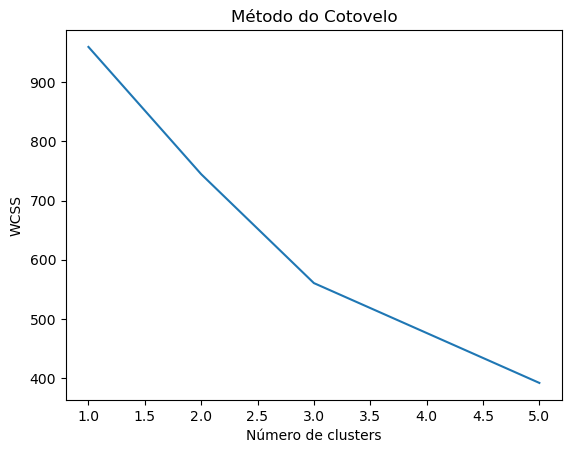

      Ano        Mes  Total  Worm    DOS  Invasao   Web   Scan  Fraude  \
0    2019    Janeiro  62481  7796   4191       19  2594  46038    1744   
1    2019  Fevereiro  70069  7707   2192       27  4179  54401    1459   
2    2019      Março  85409  4476  29309       19  2006  47966    1521   
3    2019      Abril  59900  7624   2718       37  1555  45774    2119   
4    2019       Maio  52129  6555  15773       74  1425  25521    2633   
..    ...        ...    ...   ...    ...      ...   ...    ...     ...   
115  2010     Agosto  14171  1213      4        5   928   9186    2596   
116  2010   Setembro  13177   904      0       11   734   8882    2413   
117  2010    Outubro  13078  1555      1       18   835   8521    1968   
118  2010   Novembro  14551   991    157        9   825  10072    2257   
119  2010   Dezembro  14059  1181     21        5   871   8832    2887   

     Outros  Cluster  
0        99        1  
1       104        1  
2       112        1  
3        73        

In [7]:
# Remova as colunas 'Ano' e 'Mes' para clusterização
df_cluster = df.drop(['Ano', 'Mes'], axis=1)

# Normalizar os dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_cluster)

# Método do Cotovelo para determinar o número de clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Escolha um número de clusters baseado no gráfico e realize o K-means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_normalized)

df['Cluster'] = clusters

print(df)


In [10]:
# Grouping the DataFrame by 'Ano' and summing up the invasions for each type
inv_per_year = df.groupby('Ano')[['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']].sum()

# Optionally, you can add a new column 'Total' that contains the sum of all types of invasions
inv_per_year['Total'] = inv_per_year.sum(axis=1)

print(inv_per_year)

        Worm     DOS  Invasao    Web    Scan  Fraude  Outros    Total
Ano                                                                  
2010   17628     198       89   8712   80769   31008    4440   142844
2011   26897     272      106  15491  119755   40381  196613   399515
2012   38466     309     7815  25557  232498   69561   91823   466029
2013   27979    1030    11207  18721  165396   85675   42917   352925
2014   42191  223935     6509  28808  263659  467621   14308  1047031
2015   47722   25360     2457  65647  391223  168775   21021   722205
2016   28248   60432     1695  55441  383903  102718   14675   647112
2017   45101  220188      401  60766  443258   59319    4742   833775
2018   39071  158407     1075  41193  397590   37684    1494   676514
2019  100477  301308      527  22334  409748   39419    1514   875327
